In [79]:
import pandas as pd

In [80]:
import seaborn as sns

In [81]:
import matplotlib.pyplot as plt

In [82]:
air_company = pd.read_csv(r"C:\Users\User\Desktop\IronHack\Week_3\Day1\air_company.csv")

In [83]:
air_company.isna().sum()

Loyalty Number                      0
Country                             0
Province                            0
City                                0
Postal Code                         0
Gender                              0
Education                           0
Salary                          99565
Marital Status                      0
Loyalty Card                        0
CLV                                 0
Enrollment Type                     0
Enrollment Year                     0
Enrollment Month                    0
Cancellation Year              344380
Cancellation Month             344380
Year                                0
Month                               0
Total Flights                       0
Distance                            0
Points Accumulated                  0
Points Redeemed                     0
Dollar Cost Points Redeemed         0
Status                              0
dtype: int64

In [84]:
air_company['Cancellation Month'] = air_company['Cancellation Month'].fillna(0)

In [85]:
air_company['Cancellation Year'] = air_company['Cancellation Year'].fillna(0)

In [86]:
air_company['Salary'] = air_company['Salary'].fillna(0)

In [87]:
air_company['Status'] = air_company['Cancellation Year'].apply(lambda x: 'Cancelled' if x != 0 else 'Active')

In [88]:
mean_status_points = air_company.groupby('Status')['Points Redeemed'].mean().reset_index()

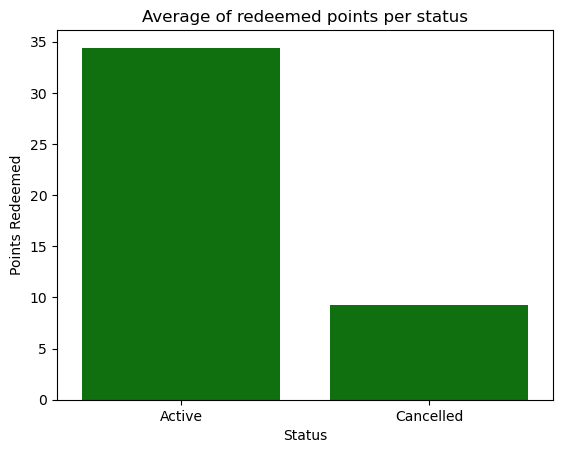

In [89]:
sns.barplot(x='Status', y='Points Redeemed', data=mean_status_points, color='green')
plt.title('Average of redeemed points per status')
plt.show()

In [90]:
mean_status_flights = air_company.groupby('Status')['Total Flights'].mean().reset_index()

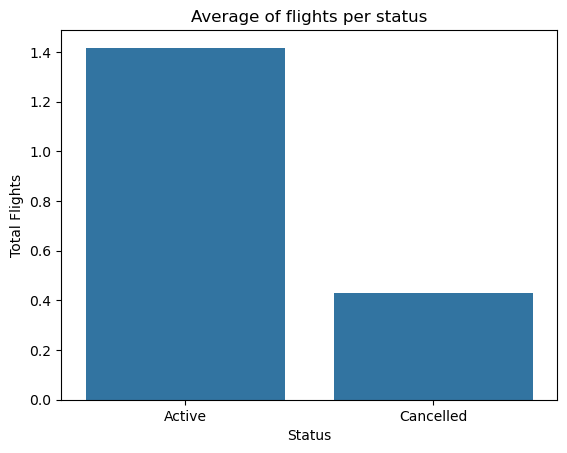

In [91]:
sns.barplot(x='Status', y='Total Flights', data=mean_status_flights)
plt.title('Average of flights per status')
plt.show()

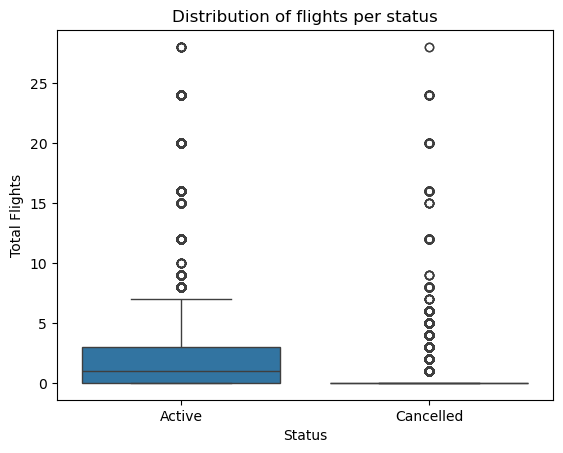

In [92]:
sns.boxplot(x='Status', y='Total Flights', data=air_company)
plt.title('Distribution of flights per status')
plt.show()

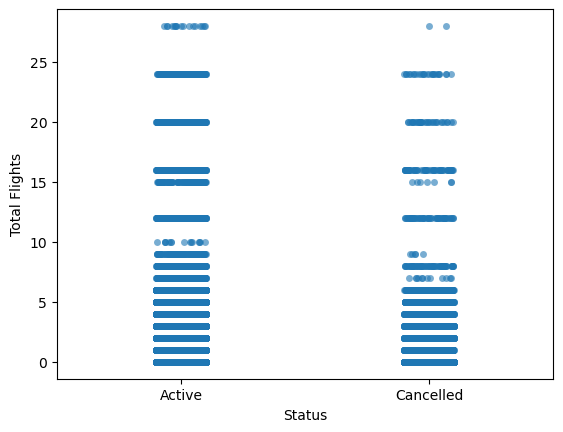

In [93]:
sns.stripplot(
    x="Status", 
    y="Total Flights", 
    data=air_company,
    jitter=True,
    alpha=0.6)
plt.show()

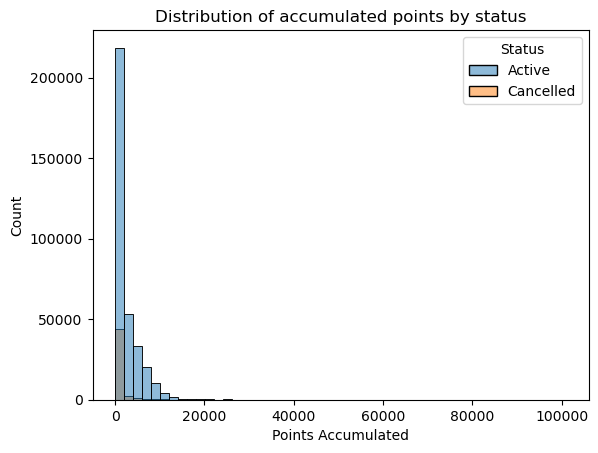

In [94]:
sns.histplot(data=air_company, x="Points Accumulated", hue="Status", kde=False, bins=50)
plt.title("Distribution of accumulated points by status")
plt.show()

In [95]:
mean_status_accum = air_company.groupby('Status')['Points Accumulated'].mean().reset_index()

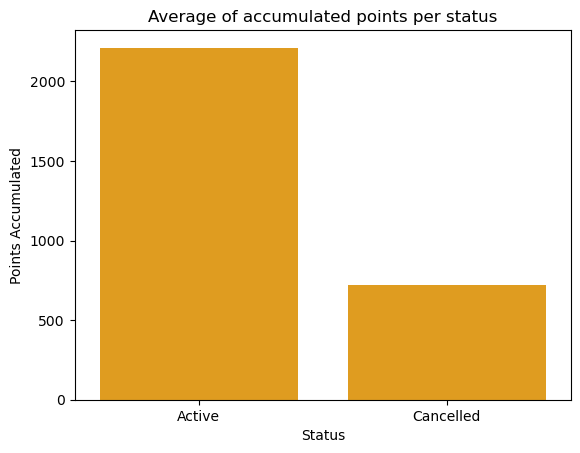

In [96]:
sns.barplot(x='Status', y='Points Accumulated', data=mean_status_accum, color='orange')
plt.title('Average of accumulated points per status')
plt.show()

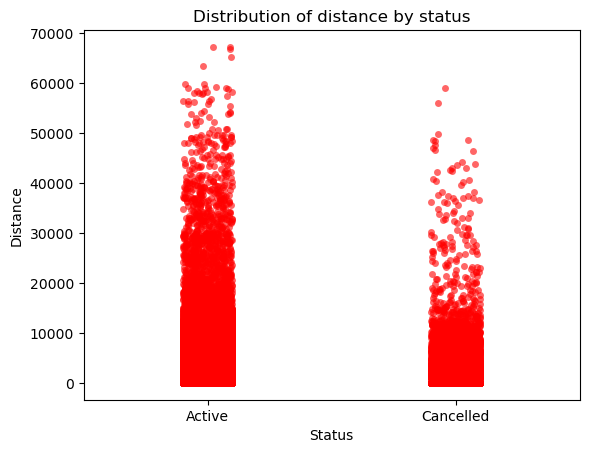

In [97]:
sns.stripplot(
    x="Status", 
    y="Distance", 
    data=air_company,
    jitter=True,
    color='red',
    alpha=0.6)
plt.title('Distribution of distance by status')
plt.show()

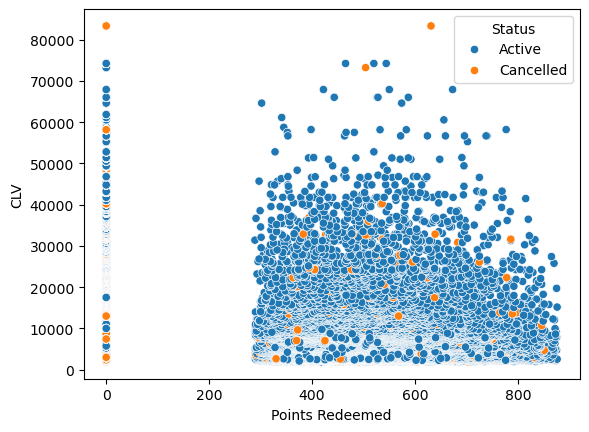

In [98]:
sns.scatterplot(data=air_company, x='Points Redeemed', y='CLV', hue='Status')
plt.show()

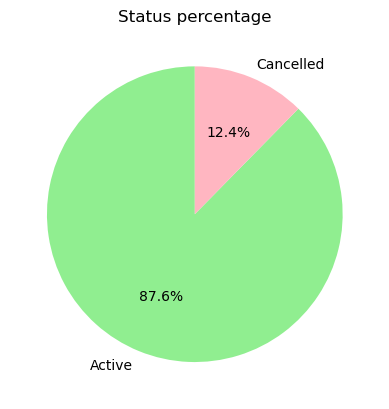

In [100]:
count_status = air_company['Status'].value_counts()
plt.pie(count_status, labels=count_status.index, autopct='%1.1f%%', startangle=90, colors=['lightgreen','lightpink']) 
plt.title('Status percentage')
plt.show()